<a href="https://colab.research.google.com/github/Shrasti96/ML_Projects/blob/main/DBSCAN_Clustering_Code_for_insurance_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Load the 'insurance.csv' file
df = pd.read_csv("insurance.csv")

In [ ]:
# 2. Preprocess the data
# DBSCAN requires only numeric data, so we need to handle categorical data.
# We are dropping the 'charges' column because it's a 'label' for supervised learning,
# but we need unlabeled data for unsupervised learning.
X = df.drop(columns=['charges'])


In [ ]:
# Identify categorical and numerical columns
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

In [ ]:
# Use ColumnTransformer to scale numeric data and one-hot encode categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough' # Keep any other columns as is (none in this case)
)

In [ ]:
# 3. Apply DBSCAN on the preprocessed data
X_preprocessed = preprocessor.fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_preprocessed)


In [ ]:
# 4. Add the cluster IDs to the original DataFrame
df['cluster'] = clusters


In [ ]:
# 5. Check the distribution of the clusters
# Cluster ID -1 represents outliers (or noise points).
print("\nCluster Distribution:")
print(df['cluster'].value_counts())



Cluster Distribution:
cluster
-1     814
 5      26
 11     23
 17     23
 22     22
 14     22
 6      21
 1      20
 0      19
 15     19
 4      18
 8      18
 10     17
 13     16
 25     14
 28     13
 26     13
 19     13
 9      13
 16     13
 2      13
 7      11
 3      10
 21      9
 32      9
 33      8
 24      8
 27      8
 45      7
 34      7
 20      7
 43      6
 37      6
 38      6
 42      6
 31      6
 29      6
 30      5
 44      5
 35      5
 41      5
 12      5
 23      5
 40      5
 18      5
 36      5
 39      3
Name: count, dtype: int64


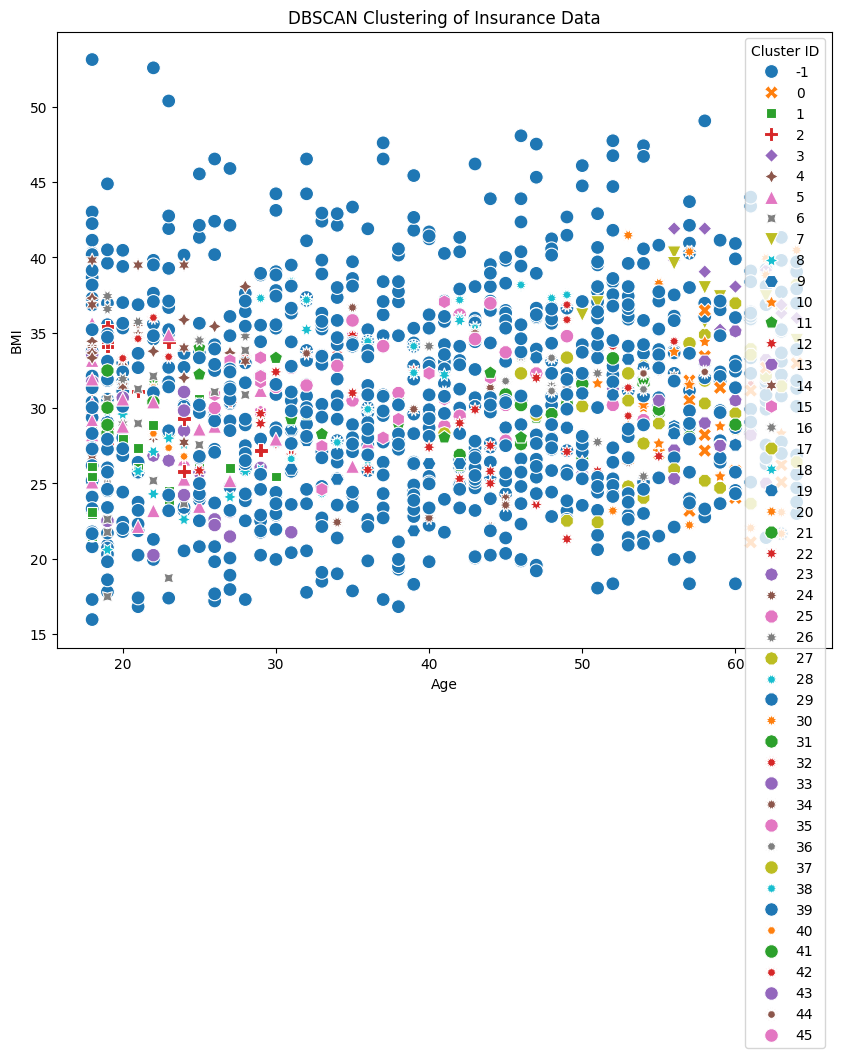

In [ ]:
# 6. Visualize the results
# For visualization, we are using the 'age' and 'bmi' columns.
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='age', y='bmi', hue='cluster', palette='tab10', style='cluster', s=100)
plt.title('DBSCAN Clustering of Insurance Data')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cluster ID')
plt.show()

In [ ]:
# 7. Analyze the clusters
# Look at the average values for each cluster
print("\nCluster-wise Averages (age, bmi, children, charges):")
cluster_analysis = df.groupby('cluster')[['age', 'bmi', 'children', 'charges']].mean()
print(cluster_analysis)


Cluster-wise Averages (age, bmi, children, charges):
               age        bmi  children       charges
cluster                                              
-1       39.572482  30.911321  1.470516  16180.226511
 0       58.947368  28.445000  0.000000  13461.621777
 1       22.100000  26.514500  0.000000   2316.824955
 2       21.615385  30.923077  0.000000   3330.475410
 3       59.900000  38.423000  0.000000  13872.114704
 4       21.777778  34.093889  0.000000   2518.865334
 5       22.653846  28.492692  0.000000   3861.720970
 6       22.047619  26.848810  0.000000   3816.295387
 7       56.454545  37.281818  0.000000  12687.538628
 8       24.333333  26.561111  0.000000   4111.414868
 9       36.769231  26.132308  1.000000   5625.981600
 10      55.941176  30.271471  0.000000  11832.546151
 11      37.260870  30.044348  1.000000   6672.128239
 12      28.800000  27.797000  1.000000   7261.299612
 13      57.937500  29.193750  0.000000  11858.895750
 14      20.590909  34.52000